# Analysis of the Linthurst data to identify the important physicochemical properties of the substrate influencing aerial biomass production in the Cape Fear Estuary of North Carolina

In [1]:
#!pip install statsmodels
#!pip install matplotlib

### Import Libraries
We start by importing essential libraries such as pandas for handling datasets, numpy for mathematical computations, and statsmodels for conducting regression analysis. These tools form the backbone of our analysis.

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from itertools import combinations

## Part I - Using the ordinary least square estimation to estimate the regression coefficients.

### Load the Data
Here, we read the LINTHALL.txt file, which contains information about biomass production (BIO) and 14 predictors related to soil properties. The data is loaded into a structured format for analysis.

In [3]:
# Load data
file_path = "C:/Users/kaur6/Downloads/Regression/Project/LINTHALL.txt"
data = pd.read_csv(file_path, delim_whitespace=True)

C:\Users\kaur6\AppData\Local\Temp\ipykernel_36872\1085252203.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True)


### Define Predictors and Response
In this step, we isolate the predictors (soil characteristics) and the response variable (BIO) into separate variables. This separation prepares the data for regression analysis.

In [4]:
# Prepare data
predictor_columns = ['H2S', 'SAL', 'Eh7', 'pH', 'BUF', 'P', 'K', 'Ca', 'Mg', 'Na', 'Mn', 'Zn', 'Cu', 'NH4']
X = data[predictor_columns]
Y = data['BIO']

### Add Intercept for Regression
We append a column of ones to the predictors, enabling the regression model to calculate an intercept term. The intercept represents the baseline biomass production when all predictors are at zero.

In [5]:
# Add intercept to predictors for regression
X_with_intercept = sm.add_constant(X)

### Fit the OLS model

In [6]:
# Fit linear regression model
model = sm.OLS(Y, X_with_intercept).fit()

### 1) Extract Regression Results
Here, we extract the key outputs of the regression model: the coefficients of the predictors, their associated standard errors, and the sum of squared errors (SSE). These metrics allow us to evaluate model performance.

In [7]:
# Extract regression coefficients, standard errors, and SSE
coefficients = model.params
std_errors = model.bse
SSE = sum((model.resid) ** 2)

# Compute sum of standard errors
sum_std_errors = sum(std_errors)

print("Regression Coefficients:\n", coefficients)
print("\nStandard Errors:\n", std_errors)
print("\nSum of Standard Errors (Σ s.e.(β̂_j)):", sum_std_errors)
print("\nSum of Squared Errors (SSE):", SSE)

Regression Coefficients:
 const    2909.934091
H2S         0.428999
SAL       -23.980716
Eh7         2.553224
pH        242.527810
BUF        -6.902268
P          -1.701511
K          -1.046591
Ca         -0.116071
Mg         -0.280228
Na          0.004451
Mn         -1.678760
Zn        -18.794521
Cu        345.162813
NH4        -2.705172
dtype: float64

Standard Errors:
 const    3412.897794
H2S         2.997919
SAL        26.169393
Eh7         2.012450
pH        334.173444
BUF       123.821077
P           2.639700
K           0.482358
Ca          0.125637
Mg          0.274452
Na          0.024723
Mn          5.373138
Zn         21.780185
Cu        112.077924
NH4         3.238010
dtype: float64

Sum of Standard Errors (Σ s.e.(β̂_j)): 4048.0882036015996

Sum of Squared Errors (SSE): 3692233.4755698624


### 2) Collinearity Diagnostics
Here we run the collinearity diagnostics to identify if there is any collinearity.
#### Calculate Variance Inflation Factor (VIF)
We compute the Variance Inflation Factor for each predictor to measure the extent of multicollinearity. A higher VIF indicates that a predictor is highly correlated with others, potentially affecting model stability.

In [8]:
# Collinearity Diagnostics
# 1. Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif_data)


Variance Inflation Factor (VIF):
    Feature         VIF
0      H2S  551.085744
1      SAL  128.585107
2      Eh7  138.480069
3       pH  250.169112
4      BUF   70.102695
5        P    4.535564
6        K   54.706609
7       Ca   22.588164
8       Mg  257.548005
9       Na   66.815038
10      Mn   11.510101
11      Zn   66.169248
12      Cu   76.519084
13     NH4   31.618182


#### Compute Condition Number
To further diagnose collinearity, we calculate the condition number of the predictors matrix. This metric evaluates the numerical stability of the matrix and highlights potential multicollinearity issues.

In [9]:
# 2. Condition Number
_, singular_values, _ = np.linalg.svd(X_with_intercept)
condition_number = max(singular_values) / min(singular_values)
print("\nCondition Number:", condition_number)


Condition Number: 1202630.375753596


#### Eigenvalues of Correlation Matrix
Finally, we analyze the eigenvalues of the predictors' correlation matrix. Small eigenvalues reveal near-linear dependencies among predictors, shedding light on multicollinearity from a geometric perspective.

In [10]:
# 3. Correlation Matrix
correlation_matrix = X.corr()
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
           H2S       SAL       Eh7        pH       BUF         P         K  \
H2S  1.000000  0.095809  0.399655  0.273529 -0.373831 -0.115394  0.068963   
SAL  0.095809  1.000000  0.309299 -0.051333 -0.012533 -0.185678 -0.020633   
Eh7  0.399655  0.309299  1.000000  0.094018 -0.153083 -0.305431  0.422611   
pH   0.273529 -0.051333  0.094018  1.000000 -0.946372 -0.401372  0.019228   
BUF -0.373831 -0.012533 -0.153083 -0.946372  1.000000  0.382936 -0.070247   
P   -0.115394 -0.185678 -0.305431 -0.401372  0.382936  1.000000 -0.226473   
K    0.068963 -0.020633  0.422611  0.019228 -0.070247 -0.226473  1.000000   
Ca   0.093307  0.087978 -0.042121  0.877978 -0.791080 -0.306692 -0.265206   
Mg  -0.107822 -0.010043  0.298503 -0.176148  0.130459 -0.063237  0.862245   
Na  -0.003763  0.162266  0.342463 -0.037720 -0.060714 -0.163228  0.792096   
Mn   0.141541 -0.253584 -0.111255 -0.475143  0.420357  0.495410 -0.347455   
Zn  -0.272398 -0.420834 -0.232005 -0.722167  0.714683 

## Part II - Using the Principle Components Regression method with collinearity reduction.
### Standardize Predictors and Perform PCA
Firstly, We Standardize predictors using StandardScaler, apply PCA to reduce dimensionality, and identify the number of components explaining at least 90% variance.

In [11]:
# Standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Determine the number of components explaining at least 90% variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= 0.90) + 1
print(f"Number of components explaining 90% variance: {n_components}")

Number of components explaining 90% variance: 6


### Examine PCA Loadings
We examine PCA loadings to evaluate the contribution of each predictor, filter significant predictors based on a threshold, and identify key variables for analysis.

In [12]:
# Examine PCA loadings to select significant predictors
loadings = pca.components_[:n_components]  # Loadings of retained components
avg_contributions = np.mean(np.abs(loadings), axis=0)  # Average contribution of each predictor
threshold = 0.2  # Adjust as needed to filter predictors
significant_predictors = avg_contributions > threshold
selected_predictors = X.columns[significant_predictors]
print(f"Selected predictors based on PCA loadings: {list(selected_predictors)}")

Selected predictors based on PCA loadings: ['H2S', 'SAL', 'Eh7', 'P', 'Ca', 'Mn']


### Run OLS Regression on Selected Predictors
Then we perform OLS regression on the selected predictors, extract coefficients, calculate standard errors, and evaluate model performance using SSE and the sum of standard errors.

In [13]:
# Run OLS regression on selected predictors
X_reduced = X[selected_predictors]  # Subset of significant predictors
X_with_intercept = sm.add_constant(X_reduced)  # Add intercept for OLS
ols_model = sm.OLS(Y, X_with_intercept).fit()

# Extract OLS results
coefficients = ols_model.params
std_errors = ols_model.bse
sse = np.sum(ols_model.resid ** 2)
sum_std_errors = np.sum(std_errors)  # Sum of Standard Errors

print("\nOLS Regression Results on Selected Predictors:")
print("Coefficients:\n", coefficients)
print("Standard Errors:\n", std_errors)
print("Sum of Standard Errors (Σ s.e.(β̂_j)):", sum_std_errors)
print("Sum of Squared Errors (SSE):", sse)


OLS Regression Results on Selected Predictors:
Coefficients:
 const    6533.613879
H2S         7.680907
SAL       -44.289814
Eh7        -0.920439
P          -2.055330
Ca          0.200833
Mn         -7.037933
dtype: float64
Standard Errors:
 const    1635.633056
H2S         2.515252
SAL        19.706339
Eh7         2.208333
P           3.035275
Ca          0.043372
Mn          3.427935
dtype: float64
Sum of Standard Errors (Σ s.e.(β̂_j)): 1666.569562638657
Sum of Squared Errors (SSE): 7672754.31405452


## Part III - Using the 5-predictor data set (LINTH-5.txt) to perform a variable selection procedure.
### Load Dataset and Extract Predictors
Firstly, we load the dataset from the specified file path and extract relevant variables.

In [14]:
# Load data
file_path_small = "C:/Users/kaur6/Downloads/Regression/Project/LINTH-5.txt"
data_small = pd.read_csv(file_path_small, delim_whitespace=True)

# Extract the relevant predictor columns
predictor_columns_small = ['SAL', 'pH', 'K', 'Na', 'Zn']
X_small = data_small[predictor_columns_small]
Y_small = data_small['BIO']

C:\Users\kaur6\AppData\Local\Temp\ipykernel_36872\1932888902.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data_small = pd.read_csv(file_path_small, delim_whitespace=True)


### Fit Linear Regression Model
Then we add an intercept term to the predictors and fit a linear regression model using OLS to analyze the relationship between the predictors and the response variable.

In [15]:
# Add intercept to predictors for regression
X_with_intercept_small = sm.add_constant(X_small)

# Fit linear regression model
model2 = sm.OLS(Y_small, X_with_intercept_small).fit()

### 1) Collinearity Diagnostics 
#### Calculate VIF
We calculate the Variance Inflation Factor (VIF) for each predictor to assess multicollinearity, indicating how much variance of a predictor is inflated due to other predictors in the model.

In [16]:
# Collinearity Diagnostics
# 1. Calculate Variance Inflation Factor (VIF)
vif_data_small = pd.DataFrame()
vif_data_small['Feature'] = X_small.columns
vif_data_small['VIF'] = [variance_inflation_factor(X_small.values, i) for i in range(X_small.shape[1])]
print("\nVariance Inflation Factor (VIF):\n", vif_data_small)


Variance Inflation Factor (VIF):
   Feature        VIF
0     SAL  23.943184
1      pH  14.601330
2       K  22.467232
3      Na  19.878963
4      Zn   5.567736


#### Condition Number
We calculate the condition number of the predictor matrix to assess numerical stability and detect potential multicollinearity issues.

In [17]:
# 2. Condition Number
_, singular_values, _ = np.linalg.svd(X_with_intercept_small)
condition_number_small = max(singular_values) / min(singular_values)
print("\nCondition Number:", condition_number_small)


Condition Number: 374201.51372987754


#### Correlation Matrix
We compute the correlation matrix of the predictors to identify potential multicollinearity by examining the relationships between the variables.

In [18]:
# 3. Correlation Matrix
correlation_matrix_small = X_small.corr()
print("\nCorrelation Matrix:\n", correlation_matrix_small)


Correlation Matrix:
           SAL        pH         K        Na        Zn
SAL  1.000000 -0.051333 -0.020633  0.162266 -0.420834
pH  -0.051333  1.000000  0.019228 -0.037720 -0.722167
K   -0.020633  0.019228  1.000000  0.792096  0.073609
Na   0.162266 -0.037720  0.792096  1.000000  0.117047
Zn  -0.420834 -0.722167  0.073609  0.117047  1.000000


### 2) Stepwise Regression
We implement a stepwise regression function that iteratively adds predictors based on p-values (forward selection) and removes non-significant predictors (backward elimination) to build the final model.

In [19]:
# Stepwise regression function
def stepwise_regression(X, Y, alpha_enter=0.12, alpha_remove=0.12):
    initial_features = X.columns.tolist()
    selected_features = []
    while True:
        # Forward step: check if we should add a predictor
        remaining_features = list(set(initial_features) - set(selected_features))
        if not remaining_features:
            break
        
        pvals = []
        for feature in remaining_features:
            model = sm.OLS(Y, sm.add_constant(X[selected_features + [feature]])).fit()
            pvals.append(model.pvalues[feature])
        
        min_pval = min(pvals)
        if min_pval < alpha_enter:
            selected_features.append(remaining_features[pvals.index(min_pval)])
            print(f'Added {remaining_features[pvals.index(min_pval)]} with p-value: {min_pval}')
        else:
            break
        
        # Backward step: check if we should remove a predictor
        while True:
            model = sm.OLS(Y, sm.add_constant(X[selected_features])).fit()
            max_pval = max(model.pvalues[1:])
            if max_pval > alpha_remove:
                excluded_feature = model.pvalues[1:].idxmax()
                selected_features.remove(excluded_feature)
                print(f'Removed {excluded_feature} with p-value: {max_pval}')
            else:
                break
    
    # Final model
    final_model = sm.OLS(Y, sm.add_constant(X[selected_features])).fit()
    return final_model

# Run stepwise regression
final_model = stepwise_regression(X_small, Y_small)
print("\nFinal Model Summary:\n", final_model.summary())

Added pH with p-value: 4.433212922668364e-10
Added Na with p-value: 0.010077605596565177

Final Model Summary:
                             OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     40.48
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           1.60e-10
Time:                        21:42:31   Log-Likelihood:                -331.33
No. Observations:                  45   AIC:                             668.7
Df Residuals:                      42   BIC:                             674.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------

### Collinearity Diagnostics after Stepwise Regression
#### Calculate VIF
We calculate the Variance Inflation Factor (VIF) for the selected predictors after stepwise regression to assess multicollinearity in the final model.

In [20]:
# Collinearity Diagnostics after stepwise regression
# 1. Calculate Variance Inflation Factor (VIF)
X_selected = X_small[final_model.model.exog_names[1:]]
X_with_intercept_selected = sm.add_constant(X_selected)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_selected.columns
vif_data['VIF'] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
print("\nVariance Inflation Factor (VIF) after Stepwise Regression:\n", vif_data)


Variance Inflation Factor (VIF) after Stepwise Regression:
   Feature       VIF
0      pH  4.810397
1      Na  4.810397


#### Calculate Condition Number
We compute the condition number for the selected predictors after stepwise regression to assess the numerical stability and potential multicollinearity issues in the final model.

In [21]:
# 2. Condition Number
_, singular_values, _ = np.linalg.svd(X_with_intercept_selected)
condition_number = max(singular_values) / min(singular_values)
print("\nCondition Number after Stepwise Regression:", condition_number)


Condition Number after Stepwise Regression: 84221.60057942959


#### Correlation Matrix
We compute the correlation matrix for the selected predictors after stepwise regression to evaluate the relationships between the variables and check for potential multicollinearity.

In [22]:
# 3. Correlation Matrix
correlation_matrix_selected = X_selected.corr()
print("\nCorrelation Matrix after Stepwise Regression:\n", correlation_matrix_selected)


Correlation Matrix after Stepwise Regression:
          pH       Na
pH  1.00000 -0.03772
Na -0.03772  1.00000


### 3) Ridge Regression and Ridge Trace
We standardize the predictors and perform ridge regression with varying regularization parameters (alpha). We then plot the ridge trace to observe the impact of regularization on the coefficients.

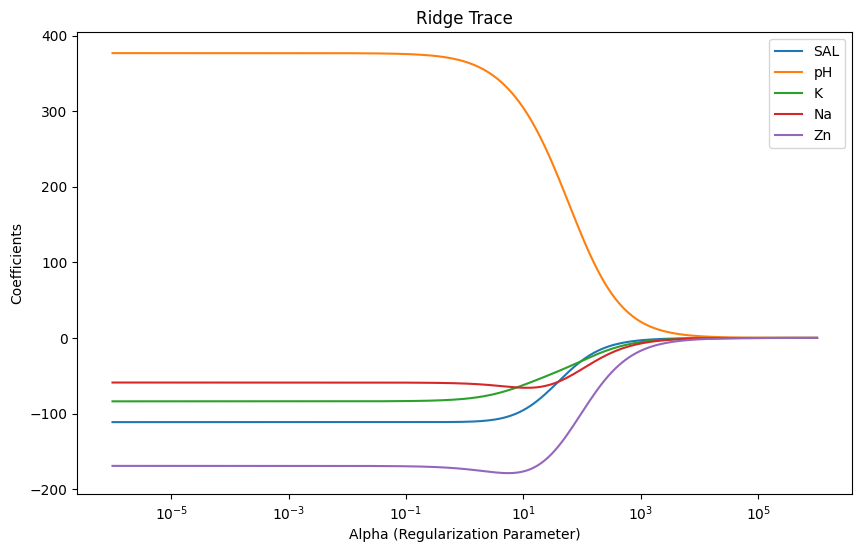

In [23]:
# Standardize the predictors (important for ridge regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_small)

# Ridge regression with varying lambda (alpha)
alphas = np.logspace(-6, 6, 200)
ridge_coefs = []

# Fit ridge regression models for different alpha values
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_scaled, Y_small)
    ridge_coefs.append(ridge.coef_)

ridge_coefs = np.array(ridge_coefs)

# Plot ridge trace
plt.figure(figsize=(10, 6))
for i in range(X_small.shape[1]):
    plt.plot(alphas, ridge_coefs[:, i], label=X_small.columns[i])
plt.xscale('log')
plt.xlabel('Alpha (Regularization Parameter)')
plt.ylabel('Coefficients')
plt.title('Ridge Trace')
plt.legend()
plt.show()

### Variable Selection on the basis of Ridge Trace
We select the optimal regularization parameter (alpha or k) based on the ridge trace, eliminate predictors with coefficients close to zero, and refit the model with the selected features to obtain the final ridge regression model.

In [24]:
# Define threshold for coefficients close to zero
threshold = 0.5

# Select alpha or lambda based on ridge trace (choose lambda where coefficients stabilize)
optimal_lambda = 10**4  # adjust based on the plot
ridge = Ridge(alpha=optimal_lambda)
ridge.fit(X_scaled, Y_small)

# Eliminate predictors with coefficients close to zero
selected_features = X_small.columns[np.abs(ridge.coef_) > threshold].tolist()
print("\nSelected Features after Ridge Regression:", selected_features)

# Refit the model with selected features
X_selected = X_small[selected_features]
X_with_intercept_selected = sm.add_constant(X_selected)

model_ridge = sm.OLS(Y_small, X_with_intercept_selected).fit()
print("\nRidge Model Summary:\n", model_ridge.summary())


Selected Features after Ridge Regression: ['pH', 'K', 'Na', 'Zn']

Ridge Model Summary:
                             OLS Regression Results                            
Dep. Variable:                    BIO   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     19.78
Date:                Mon, 02 Dec 2024   Prob (F-statistic):           4.76e-09
Time:                        21:42:32   Log-Likelihood:                -330.95
No. Observations:                  45   AIC:                             671.9
Df Residuals:                      40   BIC:                             680.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Collinearity Diagnostics after Ridge Regression
#### Calculate VIF
We calculate the Variance Inflation Factor (VIF) for the selected features after ridge regression to assess multicollinearity and ensure stability in the final model.

In [25]:
# Collinearity Diagnostics after Ridge Regression
# 1. Calculate Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_selected.columns
vif_data['VIF'] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
print("\nVariance Inflation Factor (VIF) after Ridge Regression:\n", vif_data)


Variance Inflation Factor (VIF) after Ridge Regression:
   Feature        VIF
0      pH   5.750744
1       K  22.415186
2      Na  18.771747
3      Zn   4.069271


#### Calculate Condition number
We compute the condition number for the selected predictors after ridge regression to assess the numerical stability and potential multicollinearity issues in the final model.

In [26]:
# 2. Condition Number
_, singular_values, _ = np.linalg.svd(X_with_intercept_selected)
condition_number = max(singular_values) / min(singular_values)
print("\nCondition Number after Ridge Regression:", condition_number)


Condition Number after Ridge Regression: 149333.28557809192


#### Correlation Matrix
We compute the correlation matrix for the selected predictors after ridge regression to evaluate the relationships between the variables and check for potential multicollinearity.

In [27]:
# 3. Correlation Matrix
correlation_matrix_selected = X_selected.corr()
print("\nCorrelation Matrix after Ridge Regression:\n", correlation_matrix_selected)


Correlation Matrix after Ridge Regression:
           pH         K        Na        Zn
pH  1.000000  0.019228 -0.037720 -0.722167
K   0.019228  1.000000  0.792096  0.073609
Na -0.037720  0.792096  1.000000  0.117047
Zn -0.722167  0.073609  0.117047  1.000000


### 4) Subset Selection for Best Two-Variable Model Based on AIC, BIC, and SSE
We apply the subset selection method to identify the best two-variable model based on AIC, BIC, and SSE. We compare the results from the three criteria and use VIF to break any ties, explaining why the results may differ across these criteria.

In [28]:
# Define a function to calculate VIF
def calculate_vif(X_small):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = X_small.columns
    vif_data['VIF'] = [variance_inflation_factor(X_small.values, i) for i in range(X_small.shape[1])]
    return vif_data

# Function to calculate SSE
def calculate_sse(model, X_small, Y_small):
    predictions = model.predict(X_small)
    residuals = Y_small - predictions
    sse = np.sum(residuals**2)
    return sse

# Function to calculate AIC and BIC
def calculate_aic_bic(model, X_small, Y_small):
    aic = model.aic
    bic = model.bic
    return aic, bic

# Initialize storage for results
results = []

# Loop through all combinations of two predictors
for combo in combinations(X_small.columns, 2):
    X_selected = X_small[list(combo)]
    X_with_intercept_selected = sm.add_constant(X_selected)
    
    # Fit the OLS model
    model = sm.OLS(Y_small, X_with_intercept_selected).fit()
    
    # Calculate AIC, BIC, and SSE
    aic, bic = calculate_aic_bic(model, X_with_intercept_selected, Y_small)
    sse = calculate_sse(model, X_with_intercept_selected, Y_small)
    
    # Store the results
    results.append({
        'Variables': combo,
        'AIC': aic,
        'BIC': bic,
        'SSE': sse,
        'VIF': calculate_vif(X_with_intercept_selected).loc[1:, 'VIF'].max()  # VIF for non-constant terms
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Find the best models based on AIC, BIC, and SSE
best_aic_model = results_df.loc[results_df['AIC'].idxmin()]
best_bic_model = results_df.loc[results_df['BIC'].idxmin()]
best_sse_model = results_df.loc[results_df['SSE'].idxmin()]

print("\nBest model based on AIC:")
print(best_aic_model)

print("\nBest model based on BIC:")
print(best_bic_model)

print("\nBest model based on SSE:")
print(best_sse_model)

# If there is a tie, use VIF to break it
if best_aic_model['AIC'] == best_bic_model['AIC'] and best_aic_model['AIC'] == best_sse_model['AIC']:
    if best_aic_model['VIF'] < best_bic_model['VIF']:
        print("\nTie broken using VIF. Best model is:", best_aic_model['Variables'])
    else:
        print("\nTie broken using VIF. Best model is:", best_bic_model['Variables'])


   Variables         AIC         BIC           SSE       VIF
0  (SAL, pH)  675.388526  680.808514  7.603247e+06  1.002642
1   (SAL, K)  714.535131  719.955119  1.814690e+07  1.000426
2  (SAL, Na)  713.370582  718.790570  1.768331e+07  1.027042
3  (SAL, Zn)  680.810195  686.230182  8.576766e+06  1.215216
4    (pH, K)  670.074086  675.494074  6.756309e+06  1.000370
5   (pH, Na)  668.666013  674.086001  6.548174e+06  1.001425
6   (pH, Zn)  674.831082  680.251070  7.509642e+06  2.089975
7    (K, Na)  713.529394  718.949382  1.774583e+07  2.683958
8    (K, Zn)  692.863446  698.283434  1.121113e+07  1.005448
9   (Na, Zn)  691.707771  697.127758  1.092687e+07  1.013890

Best model based on AIC:
Variables          (pH, Na)
AIC              668.666013
BIC              674.086001
SSE          6548174.234846
VIF                1.001425
Name: 5, dtype: object

Best model based on BIC:
Variables          (pH, Na)
AIC              668.666013
BIC              674.086001
SSE          6548174.234846
VI